In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data  = pd.read_csv('cars24-car-price-clean.csv')

In [5]:
data.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [12]:
# model = w0 + x1w1
def predict(x,weight):
    y_hat = weight[0] + weight[1]*x #hypothesis
    return y_hat
#MSE
def error(X,Y,weight):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_hat = predict(X[i],weight)
        total_error += (y_hat - Y[i])**2    
    return (total_error/m)

def gradient(X,Y,weight):
    m = X.shape[0]
    # print(m)
    grad = np.zeros((2,)) #initializing gradient from 0
    # print(grad)
    for i in range(200): #iterate over all points
        x = X[i]
        y_hat = predict(x,weight)
        y = Y[i]

        grad[0] += -2*(y - y_hat) 
        grad[1] += -2*(y - y_hat)*x
        # print(x, y)
        # print(2*(y - y_hat) , -2*(y - y_hat)*x)
        # print(grad)
    return grad/m

def gradient_descent(X,Y, epochs=800,learning_rate =0.1):
    weight = np.zeros((2,))
    error_list = []
    weight_list = []
    
    for i in range(epochs):
        # Compute grad
        grad = gradient(X,Y,weight)
        # print(grad)
        e = error(X,Y,weight)
        
        #Update weights
        weight[0] = weight[0] - learning_rate*grad[0]
        weight[1] = weight[1] - learning_rate*grad[1]
        # Storing the weight values during updates
        weight_list.append((weight[0],weight[1]))
        error_list.append(e)

    return weight,error_list,weight_list

In [13]:
x = data['year'].values
y= data['selling_price'].values
weights,error_list,weight_list = gradient_descent(x,y,epochs=20)

In [14]:
weights

array([-0.00630718,  0.01284886])

In [15]:
error_list

[1.0000000000000115,
 0.9994907161320266,
 0.9989833194748557,
 0.9984778035520462,
 0.9979741619087553,
 0.997472388111526,
 0.996972475748293,
 0.9964744184283504,
 0.9959782097821801,
 0.9954838434614269,
 0.9949913131388889,
 0.9945006125083755,
 0.9940117352846247,
 0.9935246752033546,
 0.9930394260209925,
 0.9925559815148294,
 0.99207433548281,
 0.9915944817434995,
 0.9911164141359928,
 0.9906401265199296]

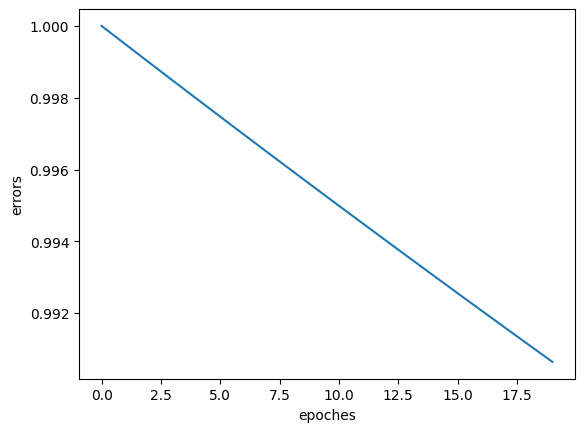

In [16]:
%matplotlib inline
fig = plt.figure()
plt.plot(error_list)
plt.xlabel('epoches')
plt.ylabel('errors')
plt.show()

In [ ]:
x = [[1.0, 0.0], [1.0, 1.0], [1.0, 2.0], [1.0, 3.0], [1.0, 4.0], [1.0, 5.0], [1.0, 6.0], [1.0, 7.0], [1.0, 8.0], [1.0, 9.0]]
y = [32.69, 30.56, 32.04, 32.27, 35.98, 34.39, 40.25, 39.24, 37.14, 39.38]
w = [30.0, 1.0]

In [ ]:
import numpy as np
x = np.asarray(x)
w = np.asarray(w)
y = np.asarray(y)

In [ ]:
y_hat = np.dot(w,x.T)

In [ ]:
denom = 2 * len(x)
ans = sum((y-y_hat)**2)/denom
ans = round(ans,2)
print(ans)

In [ ]:
x = [[1.0, 0.0], [1.0, 1.0], [1.0, 2.0], [1.0, 3.0], [1.0, 4.0], [1.0, 5.0], [1.0, 6.0], [1.0, 7.0], [1.0, 8.0], [1.0, 9.0]]
y = [26.75, 29.12, 36.46, 32.82, 30.46, 39.7, 35.52, 39.84, 36.83, 42.74]
w = [1.0, 1.0]
alpha = 0.0005
nitr = 10

In [ ]:
x = np.asarray(x)
y = np.asarray(y)
w = np.asarray(w)
# xTrans = x.T
print(x.shape)
print(w.shape)

In [ ]:
#Perform Gradient descent on data nitr times
for i in range(0, nitr):
    # calculate the output of y_pred using weights
    y_pred = np.dot(x, w)

    # Calculate the difference between y_pred and y
    loss = y_pred - y

    #average the gradient
    gradient = np.dot(x.T, loss)/(len(x))

    #Update the weights
    w = w - alpha * gradient
    
    #round off the values in array to two decimal places
    print(np.round_(w,2))

In [ ]:
# Multi varient Linear Regression

In [33]:
x = data['model'].values
y = data['selling_price'].values

In [34]:
print(x.shape)
print(y.shape)
x = x.reshape(x.shape[0],1)
y = y.reshape(y.shape[0],1)

print(x.shape)
print(y.shape)

(19820,)
(19820,)
(19820, 1)
(19820, 1)


In [35]:
def r2_score(y,y_hat):
    """
    y -> actual value
    y_hat -> predicted value
    
    """
    num = np.sum((y-y_hat)**2)
    denom = np.sum((y-y.mean())**2)
    score = 1-(num/denom)
    return score

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

Linear Regression LIB

Coeff_ -> w1

intercept -> w0

In [37]:
model.fit(x,y)

LinearRegression()

In [42]:
w1,w0 = model.coef_,model.intercept_
print(w1,w0)

[[0.96505112]] [-1.18731936e-16]


In [43]:
y_hat = model.predict(x)
print(y_hat)

[[-1.08634131]
 [-0.32158118]
 [-0.76220457]
 ...
 [-0.43300319]
 [ 0.31656303]
 [ 1.00028896]]


In [54]:
print(r2_score(y,y_hat))
print(model.score(y,y_hat)) 
"""
in nutshell it is showing R2 Score

Outlier can cause Denominator -> it can increase it.

Which in return  decrease R2 score.

"""

0.9313236629576508
0.9301022386989253


'\nin nutshell it is showing R2 Score\n\nOutlier can cause Denominator -> it can increase it.\n\nWhich in return  decrease R2 score.\n\n'

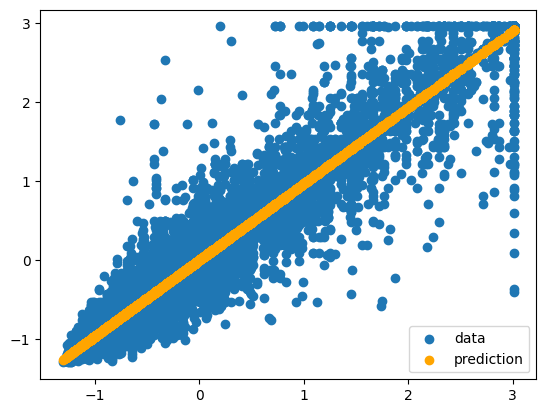

In [47]:
fig = plt.figure()
plt.scatter(x,y,label='data')
plt.scatter(x,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()